In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [3]:
style.use("ggplot")

In [4]:
data = pd.read_csv("student-mat.csv", sep=";")

In [5]:
print(data.describe)

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel f

In [6]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [7]:
print(data.school.head(30))

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   18       U     GT3       A     4     4   at_home   teacher   
1      GP   F   17       U     GT3       T     1     1   at_home     other   
2      GP   F   15       U     LE3       T     1     1   at_home     other   
3      GP   F   15       U     GT3       T     4     2    health  services   
4      GP   F   16       U     GT3       T     3     3     other     other   
5      GP   M   16       U     LE3       T     4     3  services     other   
6      GP   M   16       U     LE3       T     2     2     other     other   
7      GP   F   17       U     GT3       A     4     4     other   teacher   
8      GP   M   15       U     LE3       A     3     2  services     other   
9      GP   M   15       U     GT3       T     3     4     other     other   
10     GP   F   15       U     GT3       T     4     4   teacher    health   
11     GP   F   15       U     GT3       T     2     1  services

In [8]:
predict = "G3"

In [10]:
data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data)

In [11]:
x = np.array(data.drop([predict], 1))
y =np.array(data[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [12]:
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [16]:
    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.9426324852365886


In [17]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [18]:
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

-------------------------
Coefficient: 
 [ 0.17309144  0.96786038  0.03632409 -0.3017501  -0.20728028]
Intercept: 
 -1.5594036074348079
-------------------------


In [19]:
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

8.33306157263594 [10  9  2  0  3] 9
10.922688746533996 [13 11  0  0  2] 10
15.039869889518366 [14 15  2  0  2] 15
6.856591144654081 [7 8 8 0 4] 8
16.18082170990018 [15 16  2  0  2] 16
11.33922122610314 [12 12  1  0  4] 12
15.687309776131285 [16 15 16  0  3] 15
6.082718416143076 [ 6  7 15  1  2] 8
14.463045499272242 [15 14  8  0  2] 14
14.58684999032552 [13 15  0  0  3] 15
14.967221706489157 [14 15  0  0  2] 15
17.601701988950808 [16 17  4  0  1] 18
12.14251918248588 [10 13  6  0  4] 13
18.988393432885864 [18 18  6  0  1] 18
12.691711826375492 [10 13  4  0  1] 14
4.166684041370301 [ 5  5 12  0  2] 5
8.405709755665148 [10  9  4  0  3] 9
3.78710182356045 [ 6  5 16  3  1] 5
5.408079119246938 [ 7  6 10  0  2] 6
5.289068741499792 [7 7 5 3 2] 7
7.887645259973008 [ 6  9 14  2  1] 8
9.238938042912531 [10 10  6  0  4] 11
18.082353634500173 [16 18  2  0  3] 18
13.693863611085463 [13 13 23  0  2] 13
11.309290895238496 [10 12  4  0  3] 12
3.567947448592868 [7 5 0 1 3] 0
4.916599872140458 [5 6 6 0 2

No handles with labels found to put in legend.


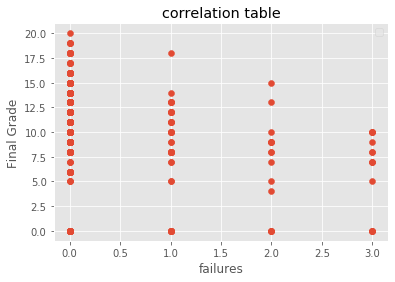

In [25]:
plt.title('correlation table')
plot = "failures"
plt.scatter(data[plot], data["G3"],marker='o')
plt.legend()
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

No handles with labels found to put in legend.


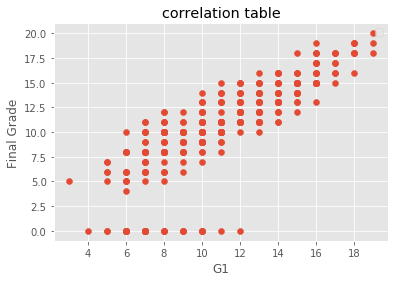

In [26]:
plt.title('correlation table')
plot = "G1"
plt.scatter(data[plot], data["G3"],marker='o')
plt.legend()
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

No handles with labels found to put in legend.


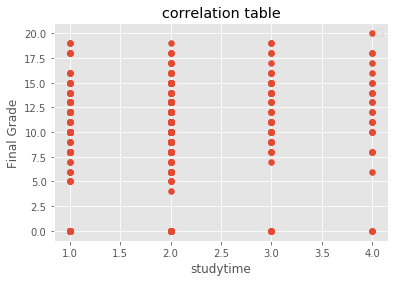

In [10]:
plt.title('correlation table')
plot = "studytime"
plt.scatter(data[plot], data["G3"],marker='o')
plt.legend()
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

No handles with labels found to put in legend.


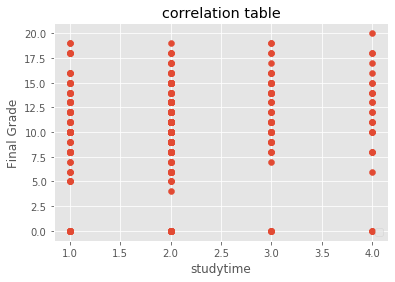

In [13]:
plt.title('correlation table')
plot = "studytime"
plt.scatter(data[plot], data["G3"],marker='o')
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()